# Sentiment Analysis of Movie reviews

## Import libraies

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # If it needs to do it.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import seaborn as sns

## Movie reviews data set

In [2]:
df = pd.read_csv('IMDB_Dataset.csv') # data download link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download

df.head()

df = df.sample(20000) # Taking 20000 random samples from dataset

## Data preprocessing

### Use one hot encoding to convert label into 0 and 1

In [3]:
df = pd.get_dummies(df, columns=['sentiment'], drop_first=True)

df.head()

,review,sentiment_positive
11189,I first saw this film about 11 years ago when ...,1
20946,"After traveling around the world, it dawned on...",1
537,"Motocrossed was fun, but it wasn't that great....",0
3691,This movie is about as underrated as Police Ac...,0
44263,OK I was bought this a few Xmas' ago by my bro...,0


### Removing tags from data

In [4]:
tag_remove = lambda x: re.sub(re.compile('<.*?>'),'',x)

In [5]:
df['review']=df['review'].apply(tag_remove)
df.head()

,review,sentiment_positive
11189,I first saw this film about 11 years ago when ...,1
20946,"After traveling around the world, it dawned on...",1
537,"Motocrossed was fun, but it wasn't that great....",0
3691,This movie is about as underrated as Police Ac...,0
44263,OK I was bought this a few Xmas' ago by my bro...,0


### Removing special charecters from data

In [6]:
special_chr_remove = lambda x: re.sub(r'\W+,. ', ' ', x) 

In [7]:
df['review']=df['review'].apply(special_chr_remove)
df.head()

,review,sentiment_positive
11189,I first saw this film about 11 years ago when ...,1
20946,"After traveling around the world, it dawned on...",1
537,"Motocrossed was fun, but it wasn't that great....",0
3691,This movie is about as underrated as Police Ac...,0
44263,OK I was bought this a few Xmas' ago by my bro...,0


### Convert all characters in dataset into lowercase

In [8]:
convert_to_lower = lambda x: x.lower()

In [9]:
df['review']=df['review'].apply(convert_to_lower)
df.head()

,review,sentiment_positive
11189,i first saw this film about 11 years ago when ...,1
20946,"after traveling around the world, it dawned on...",1
537,"motocrossed was fun, but it wasn't that great....",0
3691,this movie is about as underrated as police ac...,0
44263,ok i was bought this a few xmas' ago by my bro...,0


### Remove punctuation from dataset

In [10]:
remove_punctuation = lambda x: re.sub(r'[^\w\s]', ' ',x)

In [11]:
df['review']=df['review'].apply(remove_punctuation)
df.head()

,review,sentiment_positive
11189,i first saw this film about 11 years ago when ...,1
20946,after traveling around the world it dawned on...,1
537,motocrossed was fun but it wasn t that great ...,0
3691,this movie is about as underrated as police ac...,0
44263,ok i was bought this a few xmas ago by my bro...,0


### Remove Stop words

In [12]:
stop = stopwords.words('english')
remove_stopwords = lambda x: ' '.join([word for word in x.split() if word not in (stop)])

In [13]:
df['review']=df['review'].apply(remove_stopwords)
df.head()

,review,sentiment_positive
11189,first saw film 11 years ago former college acc...,1
20946,traveling around world dawned australia really...,1
537,motocrossed fun great guess understand lot mot...,0
3691,movie underrated police acadmey mission moscow...,0
44263,ok bought xmas ago brother law took see get sh...,0


In [14]:
# stemmer= nltk.stem.SnowballStemmer('english') # If we can use stemmer too.
lemma = nltk.wordnet.WordNetLemmatizer()

In [15]:
lemma_words = lambda x: ' '.join([lemma.lemmatize(word) for word in x.split()])

In [16]:
df['review']=df['review'].apply(lemma_words)
df.head()

,review,sentiment_positive
11189,first saw film 11 year ago former college acco...,1
20946,traveling around world dawned australia really...,1
537,motocrossed fun great guess understand lot mot...,0
3691,movie underrated police acadmey mission moscow...,0
44263,ok bought xmas ago brother law took see get sh...,0


### Converting updated dataframe to csv file

In [17]:
df.to_csv('Updated_IMDB_Dataset.csv')

In [18]:
df2 = pd.read_csv('Updated_IMDB_Dataset.csv')

### Transforming features into vectors

In [24]:
count_vec = CountVectorizer(max_features=500)
X = count_vec.fit_transform(df2['review']).toarray() # transforming feature
X.shape

(20000, 500)

In [25]:
y = df2.iloc[:,-1].values # Labels
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

## Trainning and Testing our model using Naive Bayes classifier

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=486) # Splitting our data into training snd testing data.

In [27]:
X_train.shape

(16000, 500)

In [29]:
g_NB = GaussianNB()
m_NB = MultinomialNB()
b_NB = BernoulliNB()

In [31]:
# Fitting our data into Naive Bayes classifier
g_NB.fit(X_train,y_train)
m_NB .fit(X_train,y_train)
b_NB.fit(X_train,y_train)

BernoulliNB()

In [32]:
# Predict from our trained model
y_g_NB_pred = g_NB.predict(X_test)
y_m_NB_pred = m_NB.predict(X_test)
y_b_NB_pred = b_NB.predict(X_test)

In [33]:
print(f"The accuracy score of Gaussian Naive Bayes is: {accuracy_score(y_test,y_g_NB_pred)}")
print(f"The accuracy score of Multinomial Naive Bayes is: {accuracy_score(y_test,y_m_NB_pred)}")
print(f"The accuracy score of Bernoulli Naive Bayes is: {accuracy_score(y_test,y_b_NB_pred)}")

The accuracy score of Gaussian Naive Bayes is: 0.79475
The accuracy score of Multinomial Naive Bayes is: 0.821
The accuracy score of Bernoulli Naive Bayes is: 0.8155


### Graphical comparison of accuracy 

<AxesSubplot:>

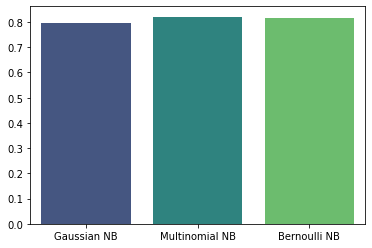

In [34]:
sns.barplot(x=['Gaussian NB','Multinomial NB','Bernoulli NB'],
            y=[accuracy_score(y_test,y_g_NB_pred),accuracy_score(y_test,y_m_NB_pred),accuracy_score(y_test,y_b_NB_pred)],palette='viridis')